In [1]:
import numpy as np

In [32]:
from scipy.stats import uniform, norm, describe, moment, skew, kurtosis
from scipy.special import gamma
from scipy.integrate import quad
from scipy.stats.sampling import SimpleRatioUniforms
import scipy

In [3]:
scipy.__version__

'1.8.0'

In [4]:
# for inline plots in jupyter
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt

In [5]:
# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(20, 10)})
sns.set_style("darkgrid")
sns.set_context("poster")

In [6]:
def calculate_kappa(skewness_, kurtosis_):
  try:
    
    kappa = (skewness_ ** 2 * ((kurtosis_ + 3) ** 2)) / (4 * (2 * kurtosis_ - 3 * skewness_ ** 2 - 6) * (4 * kurtosis_ - 3 * skewness_ ** 2))

  except ZeroDivisionError:

    kappa = 0

  return kappa

def probability_density_function_1(sigma, skewness_, kurtosis_):
  

  r = (6 * (kurtosis_ - skewness_** 2 -1)) / (6 + 3 * skewness_ ** 2 - 2 * kurtosis_)
  a1_p_a2 = (sigma / 2) * (skewness_ ** 2 * (r + 2) ** 2 + 16 * (r + 1)) ** 0.5

  m1 = 0.5 * (r - 2 + r * (r + 2) * (((skewness_ ** 2) / ((skewness_ ** 2) * ((r + 2) ** 2) + 16 * (r + 1))) ** 0.5))
  m2 = 0.5 * (r - 2 - r * (r + 2) * (((skewness_ ** 2) / ((skewness_ ** 2) * ((r + 2) ** 2) + 16 * (r + 1))) ** 0.5))
  
  if skewness_ > 0:
    tmp_ = m2
    m2 = m1
    m1 = tmp_

  ye = (1 / (a1_p_a2)) * ((((m1 + 1) ** m1) * (m2 + 1) ** m2) / ((m1 + m2 + 2) ** (m1 + m2))) * ((gamma(m1 + m2 + 2)) / ((gamma(m1 + 1)) * (gamma(m2 + 1))))
  a2 = a1_p_a2 / (1 + ((m1 + 1) / (m2 + 1)))
  a1 = a1_p_a2 - a2
  return lambda z: ye * ((1 + z / a1) ** m1) * ((1 - z / a2) ** m2)

def probability_density_function_2(sigma, skewness_, kurtosis_):

  r = (6 * (kurtosis_ - skewness_** 2 -1)) / (-6 - 3 * skewness_ ** 2 + 2 * kurtosis_)
  v = ((-r) * (r - 2) * (skewness_)) / (((16 * (r - 1)) - ((skewness_ ** 2) * ((r - 2) ** 2))) ** 0.5)
  a = (sigma/4) * (((16 * (r - 1)) - ((skewness_ ** 2) * ((r - 2) ** 2))) ** 0.5)
  i, _ = quad(lambda phi: np.exp(-v * np.pi * 0.5) * np.power(np.sin(phi), r) * np.exp(v * phi), 0, np.pi)
  y0 = 1 / (a * i)

  me = 0.5 * (r + 2)

  return lambda z: y0 * ((1 + (z / a - v / r) ** 2) ** (-me - v * np.arctan(z / a - v / r)))


def probability_density_function_3(sigma, skewness_, kurtosis_):

  r = (6 * (kurtosis_ - skewness_** 2 -1)) / (6 + 3 * skewness_ ** 2 - 2 * kurtosis_)
  a = (sigma / 2) * (skewness_ ** 2 * (r + 2) ** 2 + 16 * (r + 1)) ** 0.5
  q2 = ((r - 2) / (2)) + ((r * (r + 2)) / (2)) * (((skewness_ ** 2) / (((skewness_ ** 2) * ((r + 2) ** 2)) + (16 * (r + 1)))) ** 0.5)
  q1 = (((r - 2) / (2)) - ((r * (r + 2)) / (2)) * (((skewness_ ** 2) / (((skewness_ ** 2) * ((r + 2) ** 2)) + (16 * (r + 1)))) ** 0.5))
  a1 = (a * (q1 - 1)) / ((q1 - 1) - (q2 + 1))
  a2 = (a * (q2 + 1)) / ((q1 - 1) - (q2 + 1))
  ye = (((q2 + 1) ** q2) * ((q1 - q2 -2) ** (q1 - q2)) * (gamma(q1))) / ((a) * ((q1 - 1) ** q1) * (gamma(q1 - q2 -1)) * (gamma(q1 + 1)))

  return lambda z : ye * ((1 + z / a1) ** -q1) * ((1 + z / a2) ** q2)

def probability_density_function_4(sigma, skewness_, kurtosis_):

  y0 = 1 / (sigma * np.sqrt(np.pi * 2))

  return lambda z: y0 * np.exp((-(z ** 2)) / (2 * sigma ** 2))

def probability_density_function_5(sigma, skewness_, kurtosis_):

  m = (5 * kurtosis_ - 9) / (2 * (3 - kurtosis_))
  a = np.sqrt((2 * (sigma ** 2) * kurtosis_) / (3 - kurtosis_))
  y0 = (1 / (a * np.sqrt(np.pi))) * ((gamma(m + (3 / 2))) / (gamma(m)))

  return lambda z: y0 * ((1 - ((z ** 2) / (a ** 2))) ** m)

def probability_density_function_6(sigma, skewness_, kurtosis_):

  m = (5 * kurtosis_ - 9) / (2 * (kurtosis_ - 3))
  a = np.sqrt((2 * (sigma ** 2) * kurtosis_) / (kurtosis_ - 3))
  y0 = (1 / (a * np.sqrt(np.pi))) * ((gamma(m)) / (gamma(m - 0.5)))

  return lambda z: y0 * ((1 + ((z ** 2) / (a ** 2))) ** (-m))


In [7]:
def calculate_probability_density_function(skewness_, kurtosis_, sigma = 1):

  kappa = calculate_kappa(skewness_, kurtosis_)

  if kappa < 0:
    print("Type = {}".format(1))
    return probability_density_function_1(sigma, skewness_, kurtosis_)

  elif 0 < kappa < 1:
    print("Type = {}".format(2))
    return probability_density_function_2(sigma, skewness_, kurtosis_)

  elif kappa > 1:
    print("Type = {}".format(3))
    return probability_density_function_3(sigma, skewness_, kurtosis_)

  elif kappa == 0 and skewness_ == 0 and kurtosis_ == 3:
    print("Type = {}".format(4))
    return probability_density_function_4(sigma, skewness_, kurtosis_)

  elif kappa == 0 and skewness_ == 0 and kurtosis_ < 3:
    print("Type = {}".format(5))
    return probability_density_function_5(sigma, skewness_, kurtosis_)

  elif kappa == 0 and skewness_ == 0 and kurtosis_ > 3:
    print("Type = {}".format(6))
    return probability_density_function_6(sigma, skewness_, kurtosis_)



In [8]:
def sample_pdf(pdf, x1 = -4, x2 = 4, n1 = 100000, n2 = 100000):

  x = np.linspace(x1, x2, n1)
  p = pdf(x)
  p = np.nan_to_num(p)

  return np.random.choice(x, n2, p = p / np.sum(p))

In [9]:
def print_summary(pdf = None, data = None):

  if pdf is not None and data is None:

    data = sample_pdf(pdf = pdf)

  return describe(data)


In [10]:
def plot_pdf(pdf = None, data = None):
  
  if pdf is not None and data is None:

    data = sample_pdf(pdf = pdf)
  
  ax = sns.histplot(data,
                  bins=500,
                  kde=True,
                  color='red',
                  fill = False,
                  stat = 'probability',
                  line_kws = {'linewidth':10})

  ax.set(xlabel='Sample', ylabel='Probability')


In [11]:
skewness_ = 0.8
kurtosis_ = 10
kappa = calculate_kappa(skewness_, kurtosis_)
print("Kappa is {}".format(kappa))
pdf = calculate_probability_density_function(skewness_, kurtosis_)

Kappa is 0.058781790862040204
Type = 2


In [12]:
print_summary(pdf = pdf)

DescribeResult(nobs=100000, minmax=(-3.990639906399064, 3.9995999959999597), mean=-0.11766211662116628, variance=1.1511623064904195, skewness=0.8342198554520136, kurtosis=1.4011476593712455)

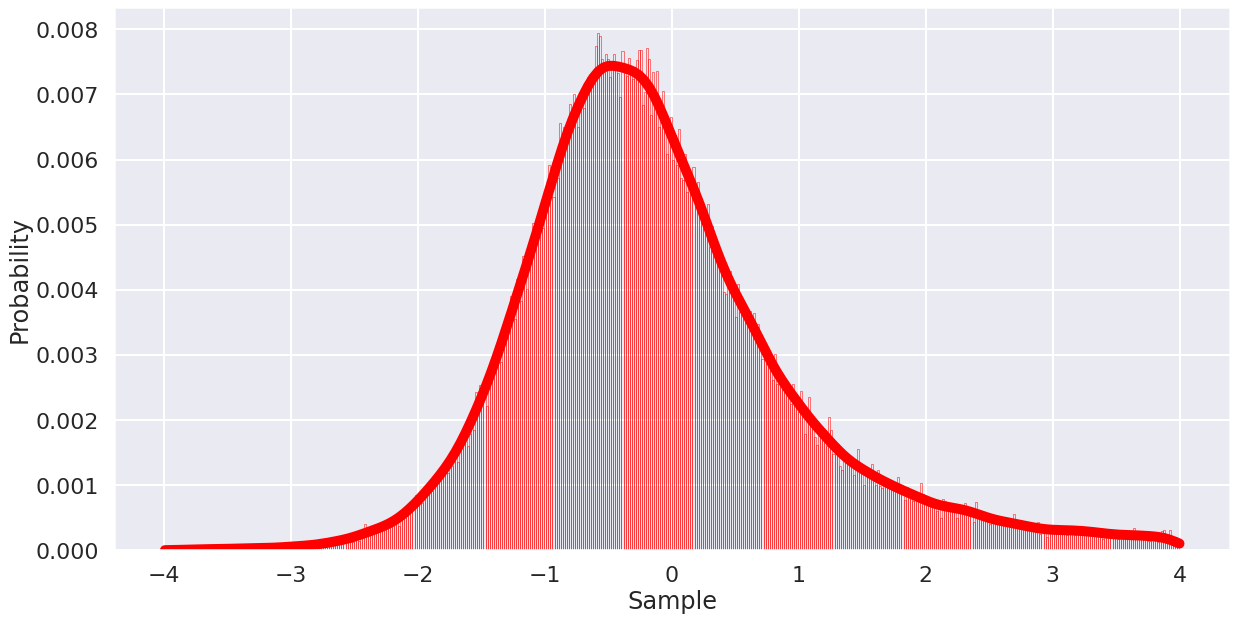

In [13]:
plot_pdf(pdf = pdf)

In [14]:
data_ = sample_pdf(pdf = pdf)
t = np.linspace(0, 2 * np. pi, data_.shape[0])
signal = np.sin(2 * np.pi * 1000 * t)


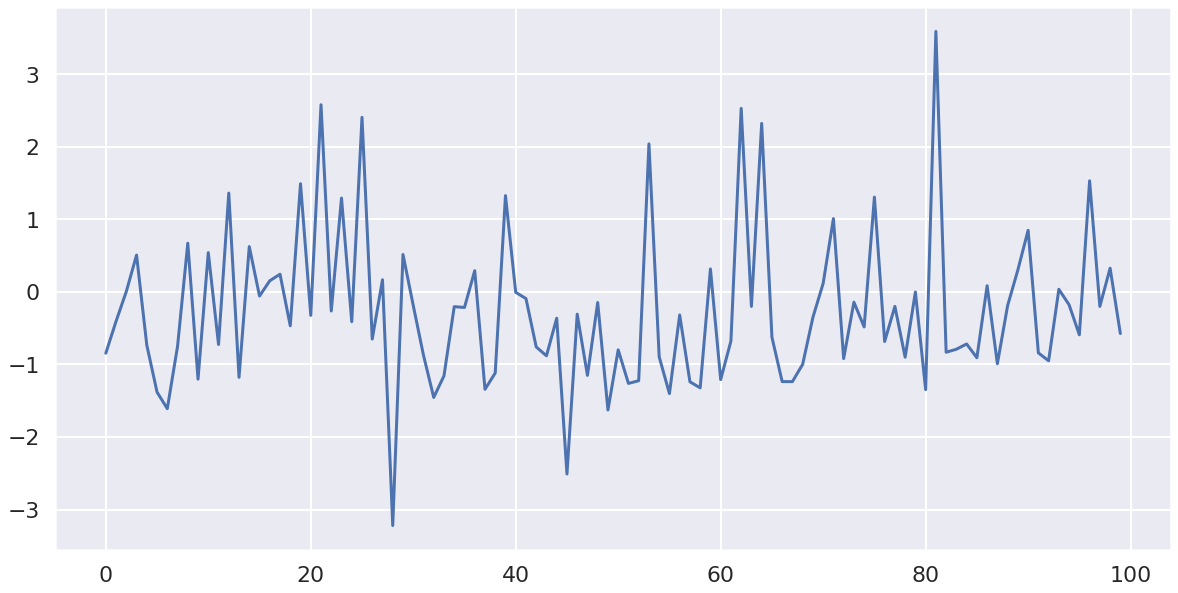

In [15]:
plt.plot(data_[:100])

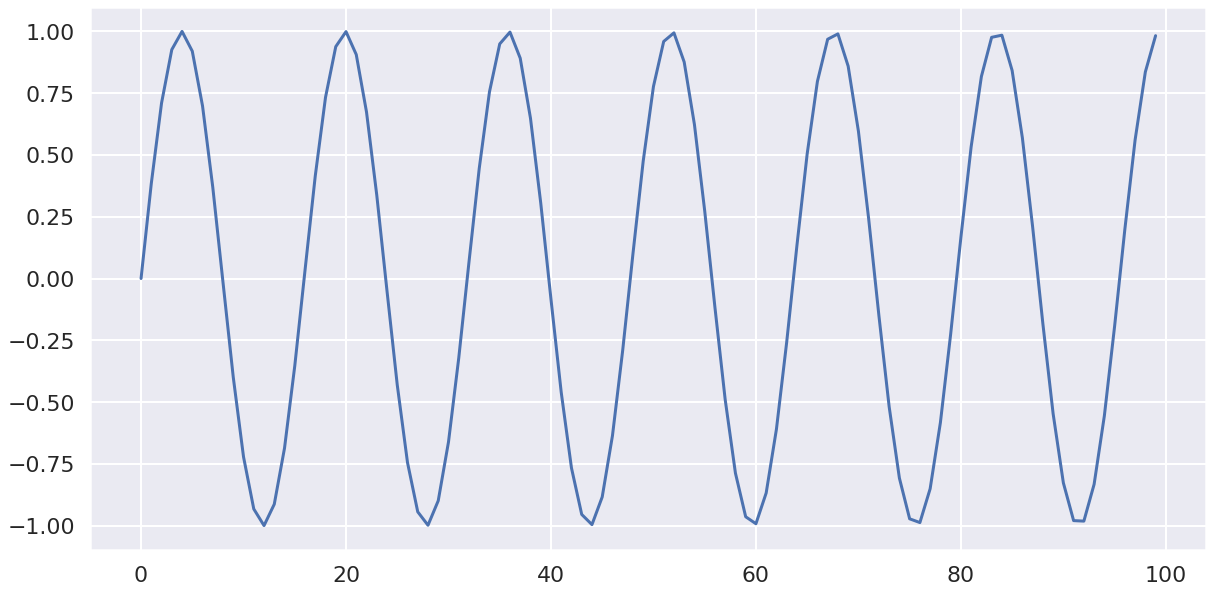

In [16]:
plt.plot(signal[:100])

In [17]:
total = data_ + signal

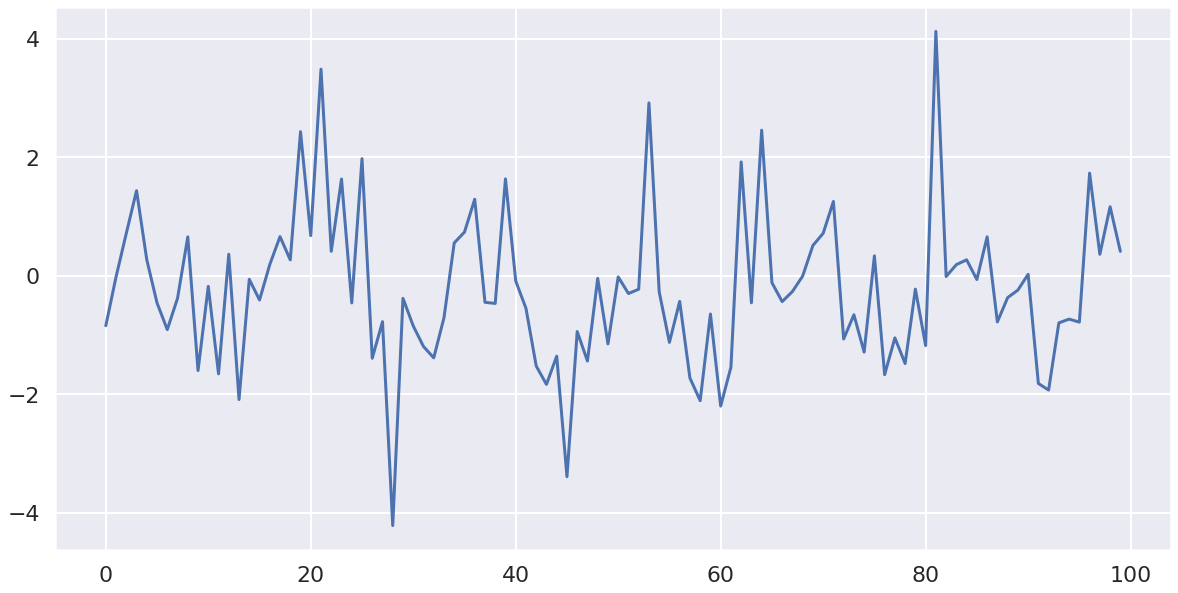

In [18]:
plt.plot(total[:100])

In [19]:

class CustomPdf:

    def __init__(self, pdf = None):

      self.pdf = pdf

    def pdf(self, x: float) -> float:

        # note that the normalization constant isn't required

        return self.pdf(x)

   

In [20]:
dst = CustomPdf(pdf = pdf)

In [21]:
rng = SimpleRatioUniforms(dst)

/tmp/ipykernel_378204/1907084088.py:1: RuntimeWarning: [objid: SROU] 22 : mode: try finding it (numerically) => (distribution) incomplete distribution object, entry missing
  rng = SimpleRatioUniforms(dst)


In [22]:
data = rng.rvs(10000)

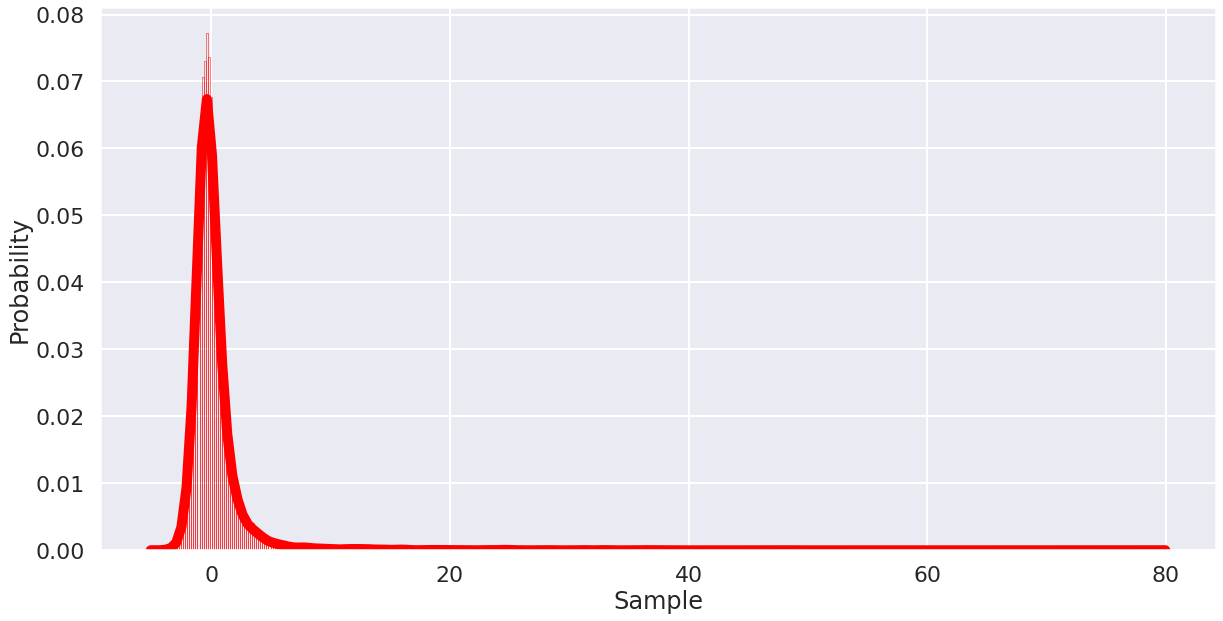

In [23]:
plot_pdf(data = data)

In [45]:
moment(data - 0.2132775622446875, 2)

6.366512809778509

In [38]:
np.mean(data)

0.2132775622446875

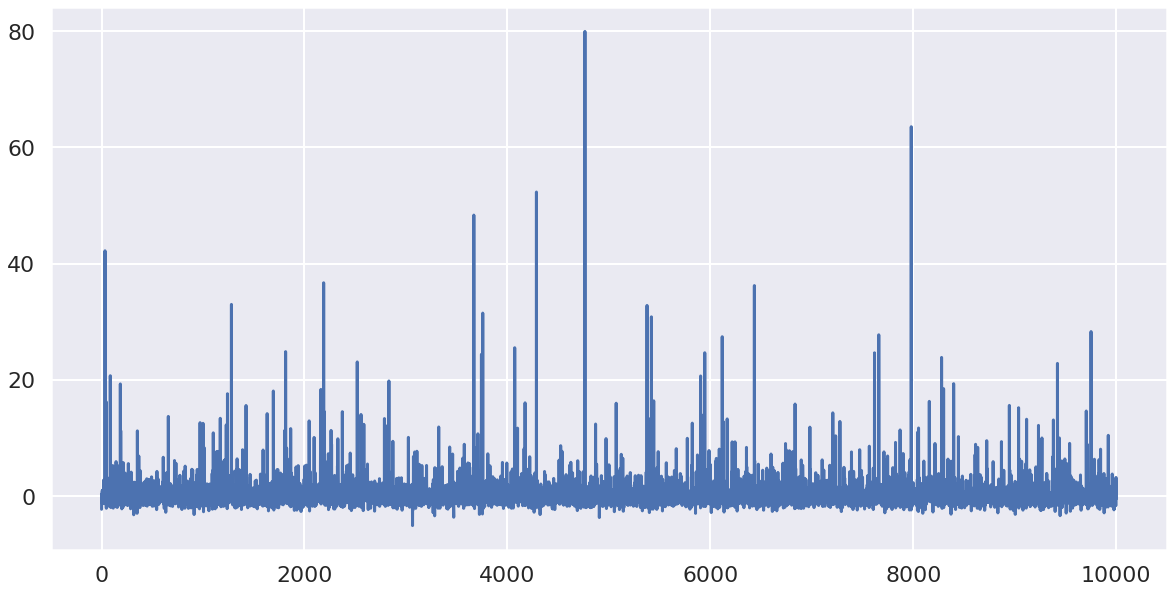

In [46]:
plt.plot(data)